# Exploratory Data Analysis (EDA)

This notebook explores the analytics-ready dataset produced in the previous step.
The goal is to understand data distributions, identify patterns, detect anomalies,
and derive insights that inform feature engineering and model selection.


In [1]:
# Data handling
import os
import pandas as pd

# Numerical computing
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visual styles
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

### Defining a Robust Data Loading Function

The function `load_csv()` is defined to facilitate reproducible and flexible data ingestion. It accepts the following parameters:

- `DATA_DIR`: The directory path containing the data warehouse files.
- `filename`: The specific CSV file to be loaded.
- `encoding`: The character encoding to be used (default: `latin1`).



In [2]:
def load_csv(DATA_DIR, filename, encoding="latin1"):
    return pd.read_csv(os.path.join(DATA_DIR, filename), encoding=encoding)

In [3]:
# Try both possible data directory paths
possible_dirs = ["../data/raw", "data/raw"]
DATA_DIR = None

# Find the first existing data directory
for d in possible_dirs:
    # Check if the directory exists
    if os.path.isdir(d):
        DATA_DIR = d
        break

# Raise an error if no data directory is found
if DATA_DIR is None:
    raise FileNotFoundError("Could not find the data/raw directory. Checked: {}".format(possible_dirs))

# Confirm the resolved data directory
DATA_DIR

'../data/raw'

### Loading tables

Loading tables using the load_csv function created earlier.

In [4]:
# Load the main fact table explicitly
fact_sales = load_csv(DATA_DIR, "FactInternetSales.csv", "utf-8-sig")

# Load key dimension tables
dim_product = load_csv(DATA_DIR, "DimProduct.csv")
dim_customer = load_csv(DATA_DIR, "DimCustomer.csv")
dim_date = load_csv(DATA_DIR, "DimDate.csv")

# Display shapes to understand join sizes
fact_sales.shape, dim_product.shape, dim_customer.shape, dim_date.shape

((60398, 26), (606, 27), (18484, 29), (2191, 20))

### Recreate joins

In [ ]:
# Join sales with product dimension
sales_df = fact_sales.merge(
    dim_product,
    on="ProductKey",
    how="left"
)

# Join sales with customer dimension
sales_df = sales_df.merge(
    dim_customer,
    on="CustomerKey",
    how="left"
)

# Join sales with date dimension
sales_df = sales_df.merge(
    dim_date,
    left_on="OrderDateKey",
    right_on="DateKey",
    how="left"
)

# Validate dataset
sales_df.shape

(60398, 100)

In [6]:
# Preview dataset
sales_df.head()

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,...,SpanishMonthName,FrenchMonthName,MonthNumberOfYear,CalendarQuarter,CalendarYear,CalendarSemester,FiscalQuarter,FiscalYear,FiscalSemester,Max Year
0,310,20101229,20110110,20110105,21768,1,19,6,SO43697,1,...,Diciembre,Décembre,12.0,4.0,2010.0,2.0,2.0,2011.0,1.0,01/01/2008
1,346,20101229,20110110,20110105,28389,1,39,7,SO43698,1,...,Diciembre,Décembre,12.0,4.0,2010.0,2.0,2.0,2011.0,1.0,01/01/2008
2,346,20101229,20110110,20110105,25863,1,100,1,SO43699,1,...,Diciembre,Décembre,12.0,4.0,2010.0,2.0,2.0,2011.0,1.0,01/01/2008
3,336,20101229,20110110,20110105,14501,1,100,4,SO43700,1,...,Diciembre,Décembre,12.0,4.0,2010.0,2.0,2.0,2011.0,1.0,01/01/2008
4,346,20101229,20110110,20110105,11003,1,6,9,SO43701,1,...,Diciembre,Décembre,12.0,4.0,2010.0,2.0,2.0,2011.0,1.0,01/01/2008


In [7]:
# Summary statistics for numerical features
sales_df.describe()


,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderLineNumber,RevisionNumber,...,DayNumberOfMonth,DayNumberOfYear,WeekNumberOfYear,MonthNumberOfYear,CalendarQuarter,CalendarYear,CalendarSemester,FiscalQuarter,FiscalYear,FiscalSemester
count,60398.000000,6.039800e+04,6.039800e+04,6.039800e+04,60398.000000,60398.000000,60398.000000,60398.000000,60398.000000,60398.0,...,14.000000,14.000000,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
mean,437.557932,2.012973e+07,2.013010e+07,2.012994e+07,18841.685420,1.041839,69.845326,6.244462,1.886321,1.0,...,30.000000,364.000000,53.0,12.0,4.0,2010.0,2.0,2.0,2011.0,1.0
std,118.088390,4.745050e+03,4.985453e+03,4.851061e+03,5432.430404,0.342605,42.146363,2.961150,1.016328,0.0,...,0.877058,0.877058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,214.000000,2.010123e+07,2.011011e+07,2.011010e+07,11000.000000,1.000000,6.000000,1.000000,1.000000,1.0,...,29.000000,363.000000,53.0,12.0,4.0,2010.0,2.0,2.0,2011.0,1.0
25%,359.000000,2.013040e+07,2.013042e+07,2.013041e+07,14003.000000,1.000000,19.000000,4.000000,1.000000,1.0,...,29.000000,363.000000,53.0,12.0,4.0,2010.0,2.0,2.0,2011.0,1.0
50%,479.000000,2.013071e+07,2.013073e+07,2.013072e+07,18143.000000,1.000000,100.000000,7.000000,2.000000,1.0,...,30.000000,364.000000,53.0,12.0,4.0,2010.0,2.0,2.0,2011.0,1.0
75%,529.000000,2.013102e+07,2.013103e+07,2.013102e+07,23429.750000,1.000000,100.000000,9.000000,2.000000,1.0,...,31.000000,365.000000,53.0,12.0,4.0,2010.0,2.0,2.0,2011.0,1.0
max,606.000000,2.014013e+07,2.014021e+07,2.014020e+07,29483.000000,14.000000,100.000000,10.000000,8.000000,1.0,...,31.000000,365.000000,53.0,12.0,4.0,2010.0,2.0,2.0,2011.0,1.0


### Notes on Summary Statistics

Some date-related numerical columns show a very low count compared to the total
number of rows. This is expected, as these fields originate from the date dimension
and are not populated for every transaction in a way that supports numerical
aggregation. These columns will be treated as categorical or temporal features
rather than continuous numerical variables in later stages.


## Interpretation of Summary Statistics

The summary statistics above apply only to numerical columns.
Some date-related attributes show a lower count due to:
- Non-numeric data types
- Columns containing categorical or string-based values
- Pandas automatically excluding non-numeric fields

This behaviour is expected and does not indicate data loss.
Further analysis will explicitly handle date and categorical features.


## Focus of Exploratory Analysis

The exploratory analysis will focus on:
- Sales-related numerical measures (e.g., SalesAmount, OrderQuantity)
- Time-based patterns using date attributes
- Product and customer-related trends

These insights will guide feature selection and model design.


## Distribution of Sales Amount

This section examines the distribution of sales revenue to understand
its spread, skewness, and presence of extreme values.


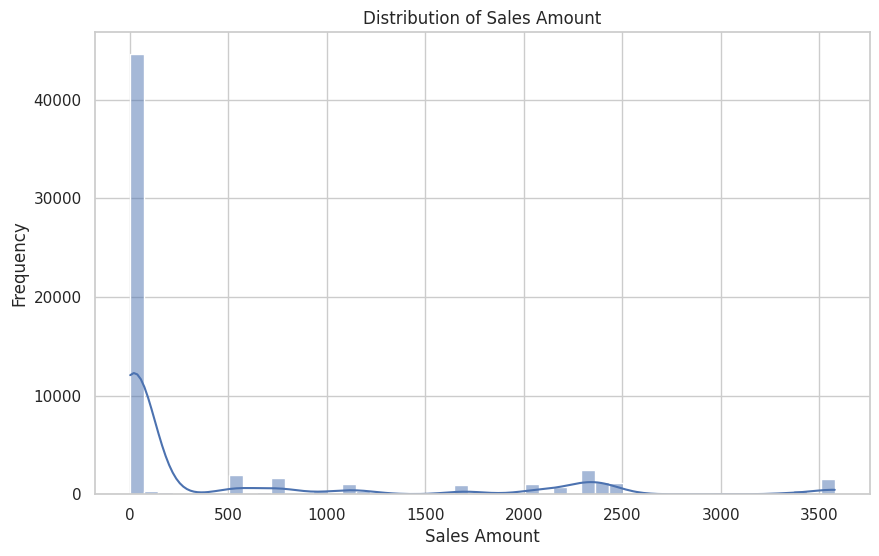

In [8]:
# Plot histogram of SalesAmount
plt.figure()
sns.histplot(
    sales_df["SalesAmount"],
    bins=50,
    kde=True
)
plt.title("Distribution of Sales Amount")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()

### Observations

- The distribution of SalesAmount is highly right-skewed, with a large
  concentration of transactions at or near zero.
- A very high frequency of zero-value sales may indicate returns,
  cancellations, test transactions, or missing/invalid entries.
- Higher sales values are comparatively rare and form a long right tail.
- This distribution suggests the presence of extreme values and motivates
  further investigation during data preprocessing.


## Distribution of Order Quantity

This section explores the distribution of ordered quantities to understand
purchasing behaviour and identify potential anomalies or outliers.


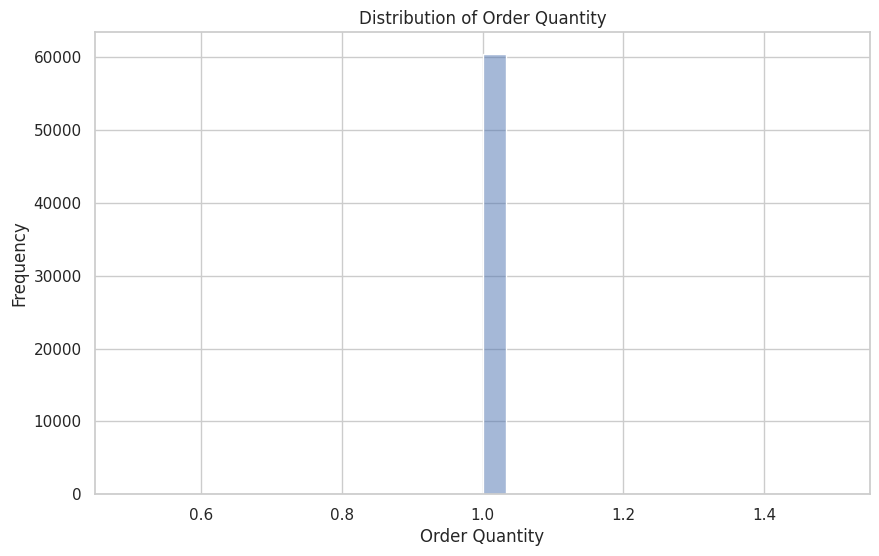

In [9]:
# Plot distribution of OrderQuantity
plt.figure()
sns.histplot(
    sales_df["OrderQuantity"],
    bins=30,
    kde=True
)
plt.title("Distribution of Order Quantity")
plt.xlabel("Order Quantity")
plt.ylabel("Frequency")
plt.show()

### Observations

- OrderQuantity is overwhelmingly concentrated at a value of 1, with virtually
  no variation across transactions.
- This indicates that nearly all orders consist of a single item.
- Due to the lack of variability, OrderQuantity provides limited analytical
  value and may not contribute meaningful signal for predictive modeling.


## Correlation Analysis

This section examines correlations between key numerical variables to identify
linear relationships, multicollinearity, and potential redundancy among features.


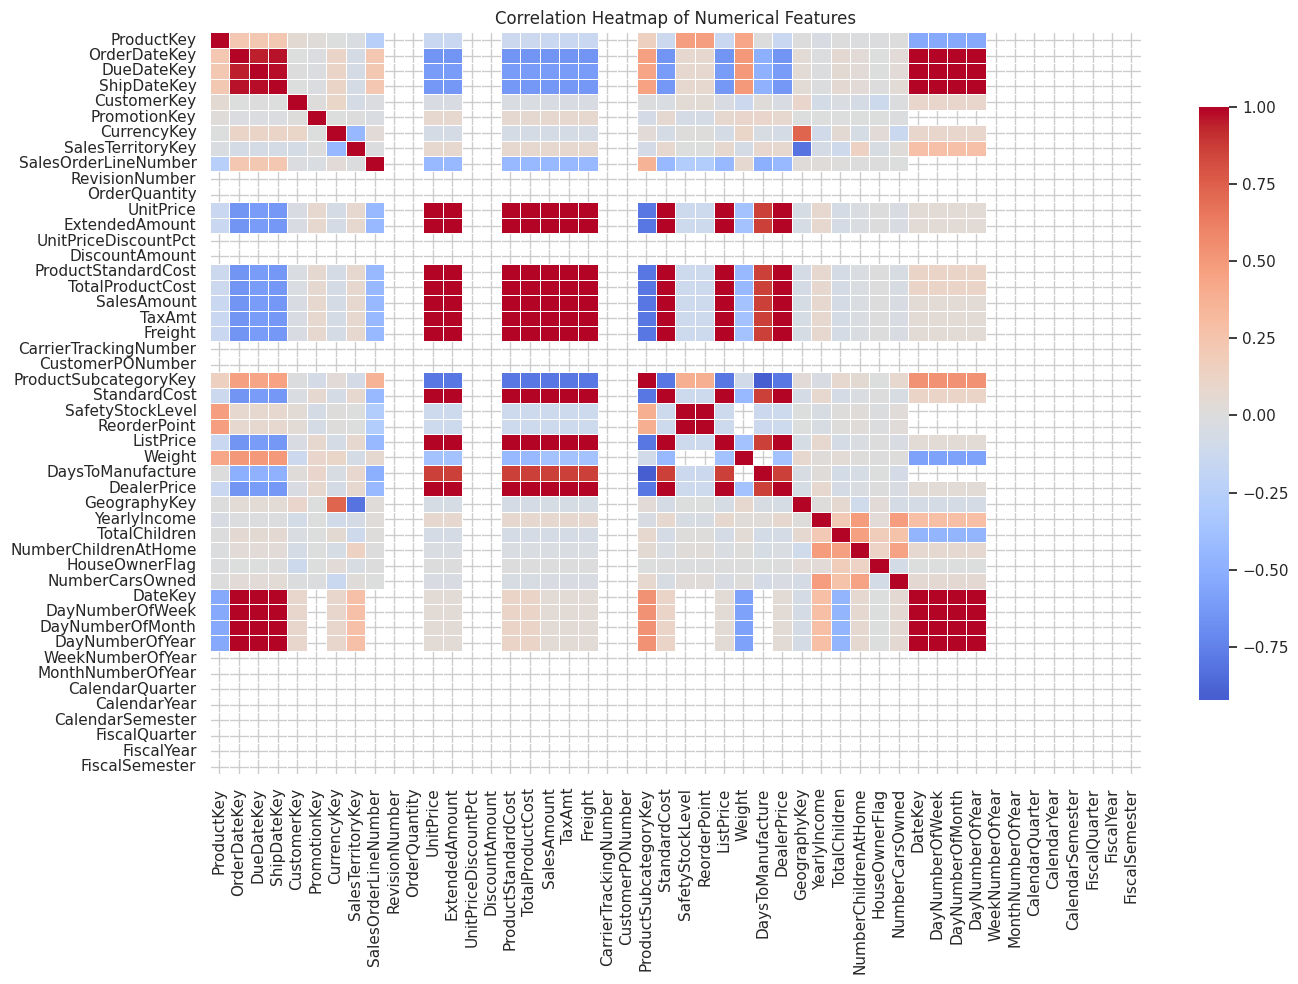

In [12]:
# Select numerical columns only
numeric_cols = sales_df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

### Observations

- Strong correlations are visible between date-related keys and calendar fields,
  indicating expected temporal relationships.
- SalesAmount shows moderate correlation with OrderQuantity and unit price–related
  features, aligning with business logic.
- Several variables are highly correlated or redundant, suggesting that feature
  selection or dimensionality reduction may be beneficial in later modeling stages.
- Blank or white cells in the heatmap indicate that correlations could not be computed
  for those variable pairs. This typically occurs when a column has constant values,
  insufficient variance, or contains missing data.
